# VARIABLES CRÍTICAS PARA PRONOSTICAR EL VALOR DE INMUEBLES EN CDMX #

El primer paso del proyecto se basa en realizar un anális de conglomerados donde apoyados por los profesores tendremos acceso a una base de datos con información de bienes inmuebles de las diferentes alcaldías de la CDMX. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 1. DEFINICIÓN DEL PROBLEMA

En 2023 el INEGI informó que la acitivad económica del primer subsector;renta de bienes inmuebles, generó alrededor de 9.7 millones de empleos en México, equivalente al 11% de la PEA y de 2005  2019 aportó entre el 6% y 11% del PIB anual.  
Ante el creciente desarrollo del mercado y el uso de nuevas tecnologías, el CEO de Erich Zann y Asociados (destacada compañía inmobiliaria en CDMX) pide al gerente de Mercadotecnia renovar los procedimientos y tecnologías necesarias para determinar el valor de venta de los bienes raíces que su negocio ofrece en la ciudad.  
Se realizarán cambions en la estartegia de promoción y venta de los inmuebles para destacar el hecho que la empresa utiliza métodos analíticos para identificar las variables clave que determinan el precio de un inmueble.



# 2. DEFINICIÓN DE VARIABLES.

1. Elección de la ubicación (elección de variables X)
2.

In [67]:
#Primer visualización de la base de datos.
df = pd.read_excel("RetoConglomerados.xlsx")
df.head(10)

,Alcaldia,Colonia,X1,X2,X3,X4,X5,X6,X7,X8,...,Gimnasio,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2
0,La Magdalena Contreras,San Jerónimo Líndice,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,...,Si,No,No,Si,Si,150.0,2.0,3,2,6500.00
1,Tlahuac,Xochicalli,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,51.0,1.0,2,1,1200.00
2,Cuajimalpa,Bosques de las Lomas,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,...,Si,No,No,Si,Si,305.0,3.0,3,3,17500.00
3,Tlahuac,La Turba,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,42.0,1.0,2,1,1046.40
4,Tlahuac,Miguel Hidalgo,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,50.0,1.0,2,1,1195.00
5,Tlahuac,Los Olivos,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,80.0,1.0,2,1,387.66
6,Miguel Hidalgo,Polanco,0.611027,5.569242,35.542918,10.499484,18.457227,1.058463,0.068491,0.026194,...,Si,No,No,Si,Si,163.0,2.0,3,2,12738.00
7,Alvaro Obregon,Jardines del Pedregal,1.339167,5.683630,42.852474,17.831208,23.737688,3.189615,0.282937,0.026174,...,Si,No,No,Si,Si,144.0,2.5,3,2,7150.00
8,Xochimilco,Santiago Tepalcatlalpan,2.300547,4.569401,46.684362,21.301165,32.138411,6.805507,10.209771,0.172423,...,No,No,No,No,No,50.0,1.0,2,1,2950.00
9,Venustiano Carranza,Moctezuma 2a Sección,1.024373,6.374010,43.624973,16.351225,28.245291,2.280092,0.055234,0.035805,...,No,No,No,No,No,64.0,1.0,2,0,950.00


In [68]:
#Visualizamos el tipo de datos de nuestras variables y verificamos la ausencia de nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alcaldia       658 non-null    object 
 1   Colonia        658 non-null    object 
 2   X1             658 non-null    float64
 3   X2             658 non-null    float64
 4   X3             658 non-null    float64
 5   X4             658 non-null    float64
 6   X5             658 non-null    float64
 7   X6             658 non-null    float64
 8   X7             658 non-null    float64
 9   X8             658 non-null    float64
 10  X9             658 non-null    float64
 11  X10            658 non-null    float64
 12  Cocina_equip   658 non-null    object 
 13  Gimnasio       658 non-null    object 
 14  Amueblado      658 non-null    object 
 15  Alberca        658 non-null    object 
 16  Terraza        658 non-null    object 
 17  Elevador       658 non-null    object 
 18  m2_constru

In [69]:
#Elección preeliminar de las variables
#Características de la zona 7,8,9
#Características del inmueble básicas [12,17,18,19,20,21,22]
#Características del inmueble extras [13,14,15,16]

Conglomerado = df.iloc[ : , [7,8,9,12,17,18,19,20,21,22,13,14,15,16]]
Conglomerado.head()

,X6,X7,X8,Cocina_equip,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2,Gimnasio,Amueblado,Alberca,Terraza
0,4.541026,0.705162,0.167438,Si,Si,150.0,2.0,3,2,6500.0,Si,No,No,Si
1,5.035624,0.957675,0.096289,Si,No,51.0,1.0,2,1,1200.0,No,No,No,No
2,4.172703,0.428650,0.061151,Si,Si,305.0,3.0,3,3,17500.0,Si,No,No,Si
3,5.035624,0.957675,0.096289,No,No,42.0,1.0,2,1,1046.4,No,No,No,No
4,5.035624,0.957675,0.096289,No,No,50.0,1.0,2,1,1195.0,No,No,No,No


In [70]:
Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("Si",1)
Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("Si ",1)

Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("No",0)

Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("Si",1)
Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("Si ",1)
Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("si",1)
Conglomerado["Elevador"]=Conglomerado["Elevador"].replace("No",0)

Conglomerado["m2_construido"]=Conglomerado["m2_construido"].replace("Si",1)
Conglomerado["m2_construido"]=Conglomerado["m2_construido"].replace("No",0)

Conglomerado["Baños"]=Conglomerado["Baños"].replace("Si",1)
Conglomerado["Baños"]=Conglomerado["Baños"].replace("No",0)

Conglomerado["Recamaras"]=Conglomerado["Recamaras"].replace("Si",1)
Conglomerado["Recamaras"]=Conglomerado["Recamaras"].replace("No",0)

Conglomerado["Lugares_estac"]=Conglomerado["Lugares_estac"].replace("Si",1)
Conglomerado["Lugares_estac"]=Conglomerado["Lugares_estac"].replace("No",0)

Conglomerado["Precio_m2"]=Conglomerado["Precio_m2"].replace("Si",1)
Conglomerado["Precio_m2"]=Conglomerado["Precio_m2"].replace("No",0)

Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("Si",1)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("Si ",1)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("No",0)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("No ",0)


Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("Si",1)
Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("Si ",1)
Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("No",0)
Conglomerado["Amueblado"]=Conglomerado["Amueblado"].replace("No ",0)

Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("Si",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("si ",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("Si ",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("No",0)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("No ",0)

Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("Si",1)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("Si ",1)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("No",0)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("No ",0)




C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_12200\4290375611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("Si",1)
C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_12200\4290375611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conglomerado["Cocina_equip"]=Conglomerado["Cocina_equip"].replace("Si ",1)
C:\Users\Carlos Casillas\AppData\Local\Temp\ipykernel_12200\4290375611.py:4: SettingWithCopyWarning: 
A value is tryi

In [71]:
Conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X6             658 non-null    float64
 1   X7             658 non-null    float64
 2   X8             658 non-null    float64
 3   Cocina_equip   658 non-null    int64  
 4   Elevador       658 non-null    int64  
 5   m2_construido  658 non-null    float64
 6   Baños          658 non-null    float64
 7   Recamaras      658 non-null    int64  
 8   Lugares_estac  658 non-null    int64  
 9   Precio_m2      658 non-null    float64
 10  Gimnasio       658 non-null    int64  
 11  Amueblado      658 non-null    int64  
 12  Alberca        658 non-null    int64  
 13  Terraza        658 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 72.1 KB


c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\

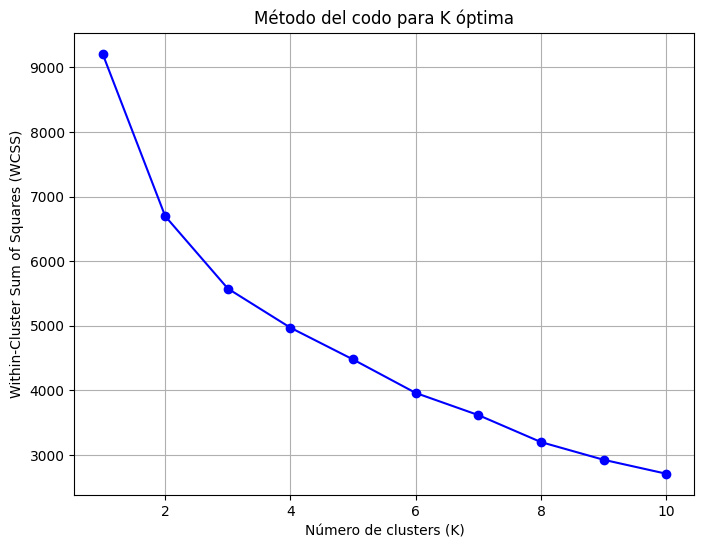

In [72]:
# Aquí se simplificará el dataset.



# Se estandarizan los valores
scaler = StandardScaler()
X = scaler.fit_transform(Conglomerado)

# Se calcula el wcss (Suma de cuadrados de las distancias intra-cluster)
# se almacena el valor en la lista wcss
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Se grafica la curva.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Método del codo para K óptima')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [73]:
#Dendograma
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Estandarización (esto afecta si no se realiza)
scaler = StandardScaler()
X_std = scaler.fit_transform(Conglomerado)

In [74]:
# se realiza el clustering con la función linkage
linked = linkage(X_std, method='ward') #como podrán observar, son las distancias

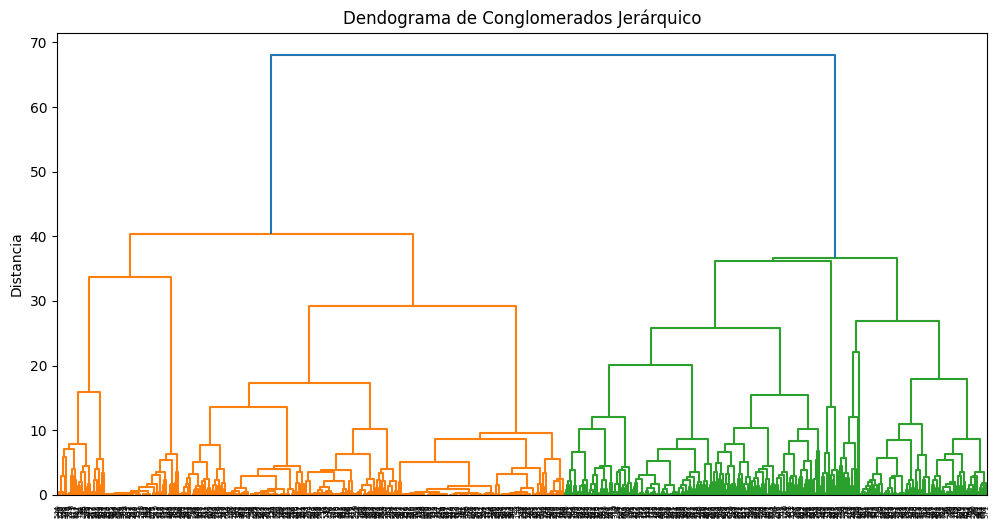

In [75]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z=linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Conglomerados Jerárquico')
plt.ylabel('Distancia')
plt.show()

In [76]:
#Elaboración de clusters
###Ya con el número de clusters seleccionados:

from sklearn.cluster import KMeans
# Elegimos el número de clusters (K)
k = 3

# Construimos el modelo de K medias
kmeans = KMeans(n_clusters=k, random_state=0)

# construimos el modelo con los datos
kmeans.fit(X_std)

# Tomamos las posiciones de los clusters y tomamos los centroides.
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


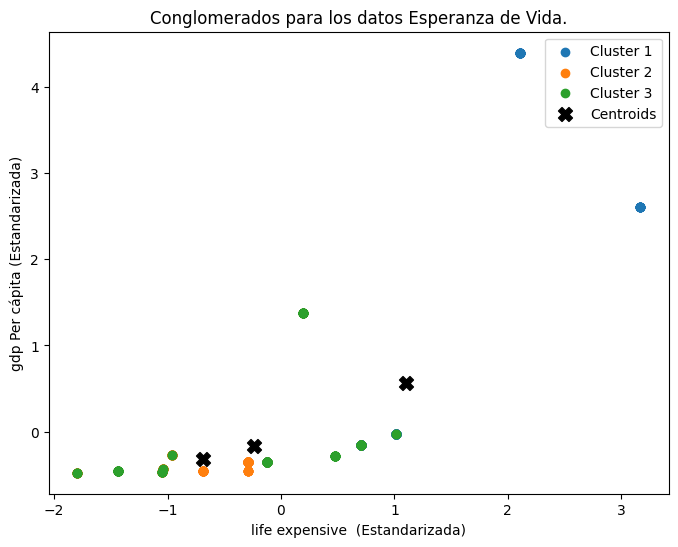

In [77]:
# Realizamos nuestra visualización de los resultados.
plt.figure(figsize=(8, 6))

# Para cada punto de datos, corresponde un color por la etiqueta de cluster
for i in range(k):
    plt.scatter(X_std[cluster_labels == i, 0], X_std[cluster_labels == i, 1], label=f'Cluster {i + 1}')

# Agregamos los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='black', label='Centroids')

plt.xlabel('life expensive  (Estandarizada)')
plt.ylabel('gdp Per cápita (Estandarizada)')
plt.title('Conglomerados para los datos Esperanza de Vida.')
plt.legend()
plt.show()